In [12]:
import sys
sys.path.insert(0, "../src")
import pandas as pd
from ritas.viz import plot_coordinates, plot_map
from ritas.polygons import make_vehicle_polygons, reshape_polygons
import geopandas as gpd
from ritas.polygons import chop_polygons, make_grid

In [19]:
df = pd.read_csv("../data/sample.csv", index_col=0)
proj4string = "epsg:26915"
#plot_coordinates(df)
geodf = make_vehicle_polygons(
    df,
    proj4string=proj4string,
)
#_ = plot_map(geodf)
reshaped_geodf = reshape_polygons(geodf)
grid = make_grid(reshaped_geodf, width=10, height=10)

#fig, ax = plt.subplots(figsize=(20, 10))
#_, ax = plot_map(grid, ax=ax)  # The returned figure is ignored in this context
#fig, ax = plot_map(reshaped_geodf, ax=ax)  # Now the returned figure is used
#plt.show()

col_identity = [col for col in reshaped_geodf.columns if col not in ['x', 'y']]
col_identity.append('effectiveArea')
col_weight = ["mass", "effectiveArea"]

chopped = chop_polygons(reshaped_geodf, grid, col_identity, col_weight)


reshaped_geodf.to_file("../data/out/reshaped.geojson", driver='GeoJSON')
chopped.to_file("../data/out/sample.geojson", driver='GeoJSON')
grid.to_file("../data/out/grid.geojson", driver='GeoJSON')

INFO:root:Running make_bounding_box...


Chopping polygons...: 100%|██████████| 8710/8710 [00:04<00:00, 1947.41it/s]


INFO:root:Creating plot...


(<Figure size 6000x6000 with 1 Axes>, <Axes: >)

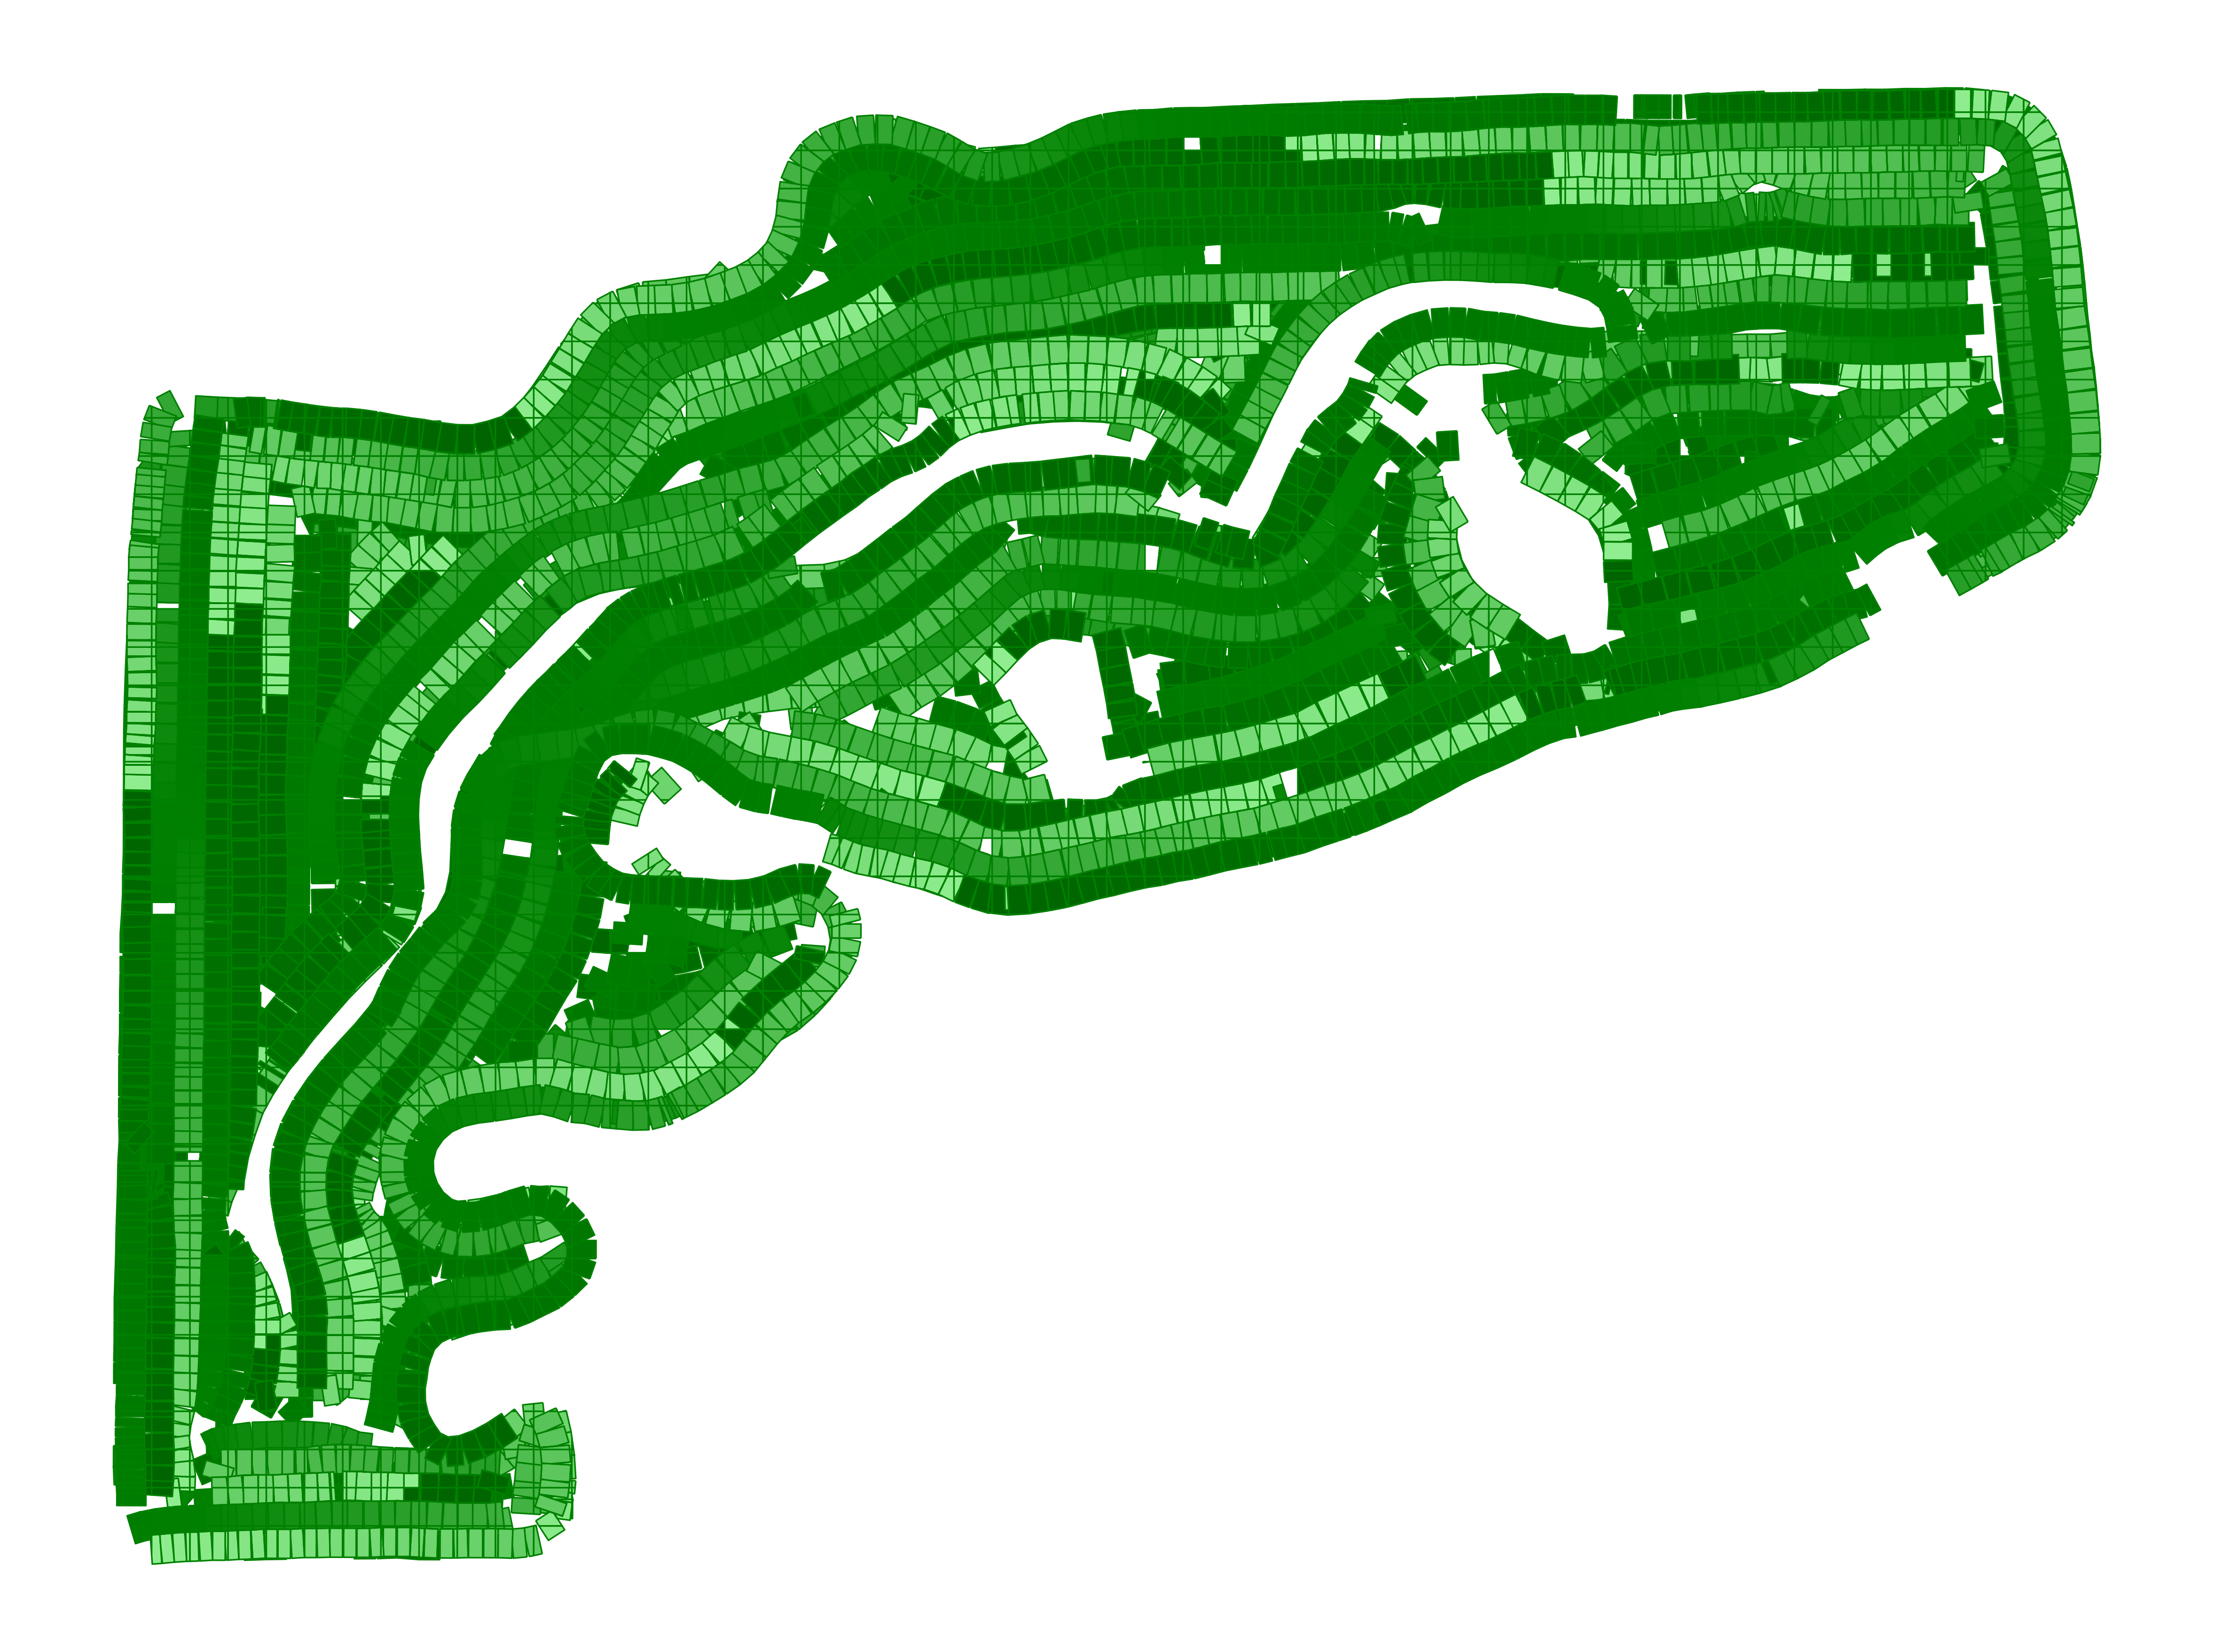

In [25]:
plot_map(chopped)

In [15]:
# read 
chopped = gpd.read_file("../data/out/sample.geojson")
grid = gpd.read_file("../data/out/grid.geojson")

In [16]:
from ritas.polygons import aggregate_polygons
import numpy as np


col_weight = ["mass", "effectiveArea"]
col_names = [f"{col}W" for col in col_weight]
col_funcs = [np.sum, np.sum]

agg_df = aggregate_polygons(chopped, grid, col_names, col_funcs, by=["gridPolyID"])

INFO:root:Creating plot...


(<Figure size 6000x6000 with 1 Axes>, <Axes: >)

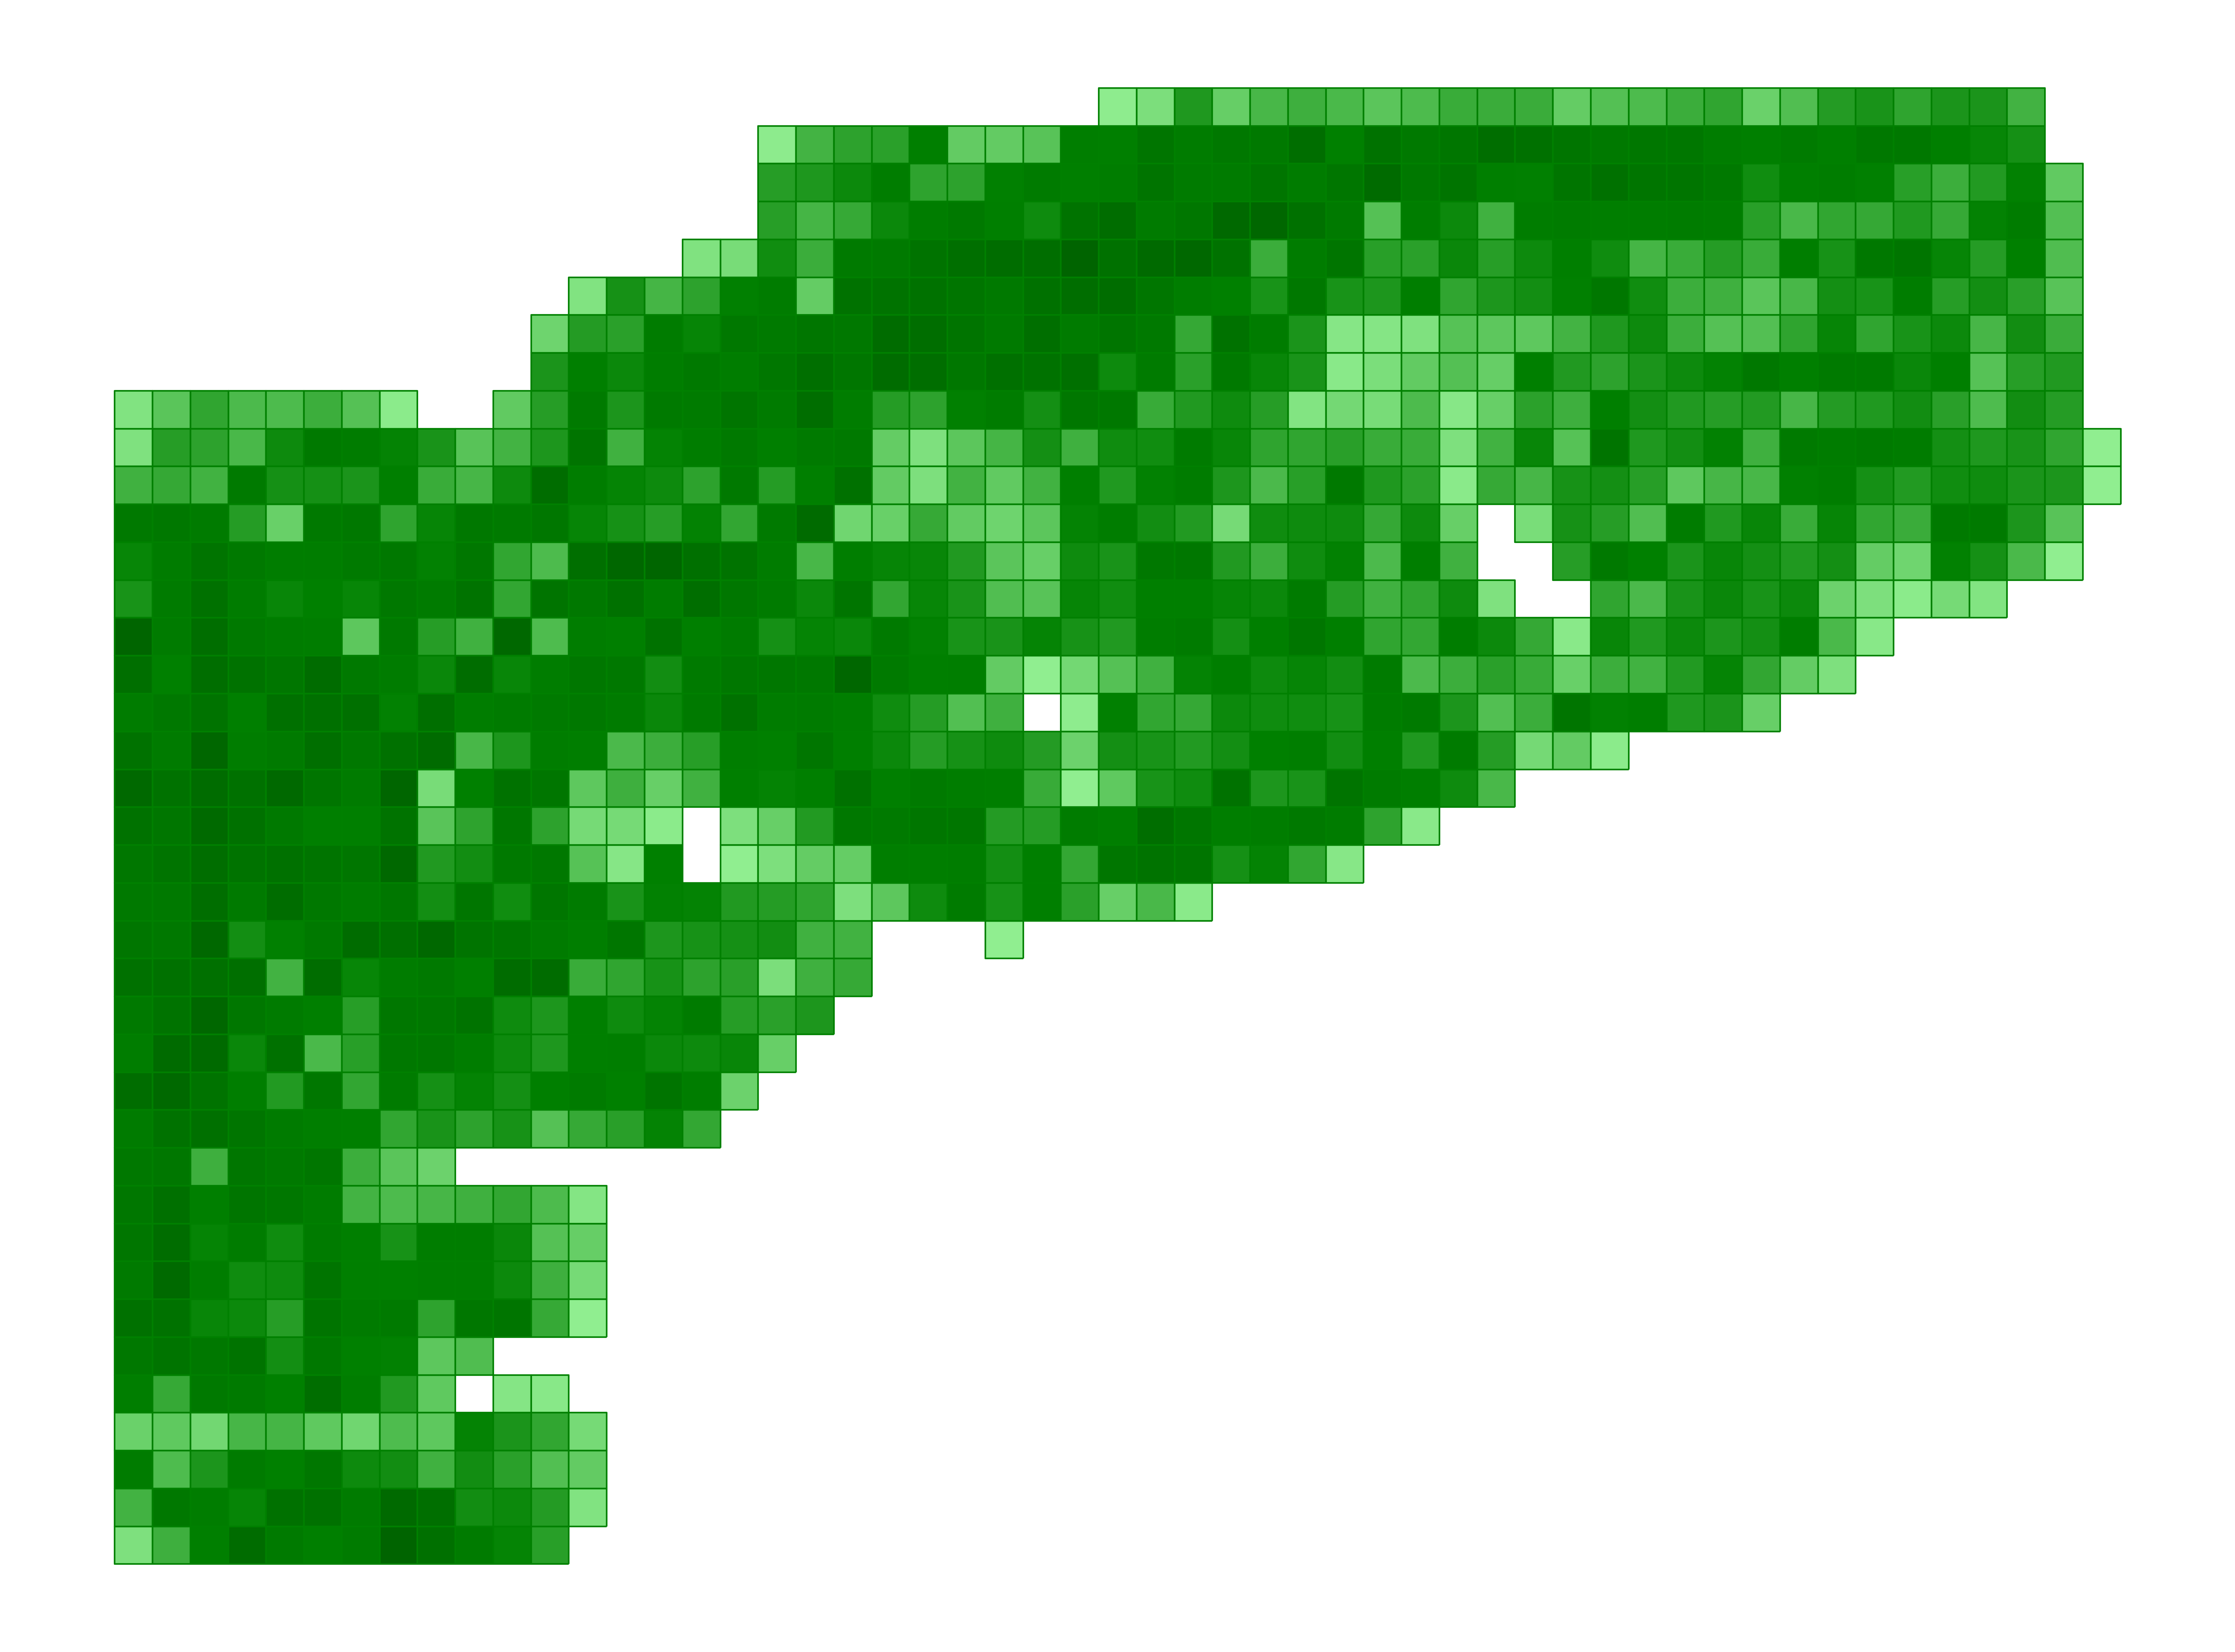

In [23]:
plot_map(agg_df, column="massWUp");

In [18]:
#from ritas.polygons import smooth_polygons

#smooth_polygons(agg, formula = formula, col_identity = col_identity)